In [209]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt

In [210]:
cell = mp.Vector3(32,8,0)

In [211]:
c1 = mp.Block(mp.Vector3(mp.inf,1,mp.inf),
                     center=mp.Vector3(0,-0.5),
                     material=mp.Medium(epsilon=11.68))
c2 = mp.Block(mp.Vector3(mp.inf,1,mp.inf),
                     center=mp.Vector3(0,1),
                     material=mp.Medium(epsilon=11.68))

In [212]:
geometry = [c1,c2]

In [213]:
sources = [mp.Source(mp.ContinuousSource(frequency=0.15),
                     component=mp.Ez,
                     center=mp.Vector3(-15,1))]

In [214]:
pml_layers = [mp.PML(1.0)]

In [215]:
resolution = 10

In [216]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

In [217]:
sim.run(until=200)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00018096 s
Working in 2D dimensions.
Computational cell is 32 x 8 x 0 with resolution 10
     block, center = (0,-0.5,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.68,11.68,11.68)
     block, center = (0,1,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (11.68,11.68,11.68)
time for set_epsilon = 0.0523031 s
-----------
run 0 finished at t = 200.0 (4000 timesteps)


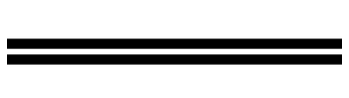

In [218]:
eps_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Dielectric)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.axis('off')
plt.show()

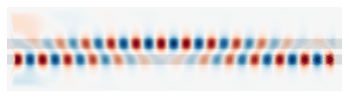

In [219]:
ez_data = sim.get_array(center=mp.Vector3(), size=cell, component=mp.Ez)
plt.figure()
plt.imshow(eps_data.transpose(), interpolation='spline36', cmap='binary')
plt.imshow(ez_data.transpose(), interpolation='spline36', cmap='RdBu', alpha=0.9)
plt.axis('off')
plt.show()